In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [ ]:
data = pd.read_csv("grade.csv")
data.head()

,Предметная область,Тип диаграммы,Соответствие стандарту,Непротиворечивость,Полнота,Комментарии соответствие стандарту,Комментарии непротиворечивость,Комментарии полнота,Общие комментарии,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Запись к врачу,Вариантов использования,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Запись к врачу,Классов,5,5,5,NaN,NaN,NaN,NaN,NaN,"4,311111111","4,2","4,177777778"
2,Запись к врачу,Последовательности,3,4,3,Используются синхронные сообщения вместо ответ...,Диаграмма отображает верхнеуровневый обмен соо...,Не отображен процесс создания расписания врачом,NaN,NaN,NaN,NaN,NaN
3,Управление доставками,Вариантов использования,5,4,4,NaN,"Указаны варианты использования, которые свойст...",Нет варианта использования: управление посылкой,"Указаны варианты использования, которые явно н...",NaN,NaN,NaN,NaN
4,Управление доставками,Классов,5,4,3,NaN,Неправильная кардинальность между DeliveryCent...,"Неверно смоделировано, что клиент может быть о...",Не выделены объект User как агрегирующий Couri...,NaN,NaN,NaN,NaN


In [ ]:
df1=data.iloc[:, :5]

In [ ]:
df=data.iloc[:, 2:5]

In [ ]:


# Рассчитываем mean для каждого типа диаграмм
grouped_mean = data.groupby('Тип диаграммы').agg({
    'Соответствие стандарту': 'mean',
    'Непротиворечивость': 'mean',
    'Полнота': 'mean'
})

# Рассчитываем std для каждого типа диаграмм
grouped_std = data.groupby('Тип диаграммы').agg({
    'Соответствие стандарту': 'std',
    'Непротиворечивость': 'std',
    'Полнота': 'std'
})

# Рассчитываем mean для всех диаграмм вместе
overall_mean = data[['Соответствие стандарту', 'Непротиворечивость', 'Полнота']].mean()

# Рассчитываем std для всех диаграмм вместе
overall_std = data[['Соответствие стандарту', 'Непротиворечивость', 'Полнота']].std()

# Добавление строки "Overall" для общего mean
overall_mean = pd.DataFrame(overall_mean).T
overall_mean.index = ['Overall']
grouped_mean = pd.concat([grouped_mean, overall_mean])

# Добавление строки "Overall" для общего std
overall_std = pd.DataFrame(overall_std).T
overall_std.index = ['Overall']
grouped_std = pd.concat([grouped_std, overall_std])

# Округление до 3 знаков после запятой
grouped_mean = grouped_mean.round(3)
grouped_std = grouped_std.round(3)

# Сохранение mean в Excel файл
mean_excel_path = 'mean_by_diagram_type.xlsx'
grouped_mean.to_excel(mean_excel_path, index=True)

# Сохранение std в Excel файл
std_excel_path = 'std_by_diagram_type.xlsx'
grouped_std.to_excel(std_excel_path, index=True)

print(f"Средние значения сохранены в файл: {mean_excel_path}")
print(f"Стандартные отклонения сохранены в файл: {std_excel_path}")


Средние значения сохранены в файл: mean_by_diagram_type.xlsx
Стандартные отклонения сохранены в файл: std_by_diagram_type.xlsx


<Axes: >

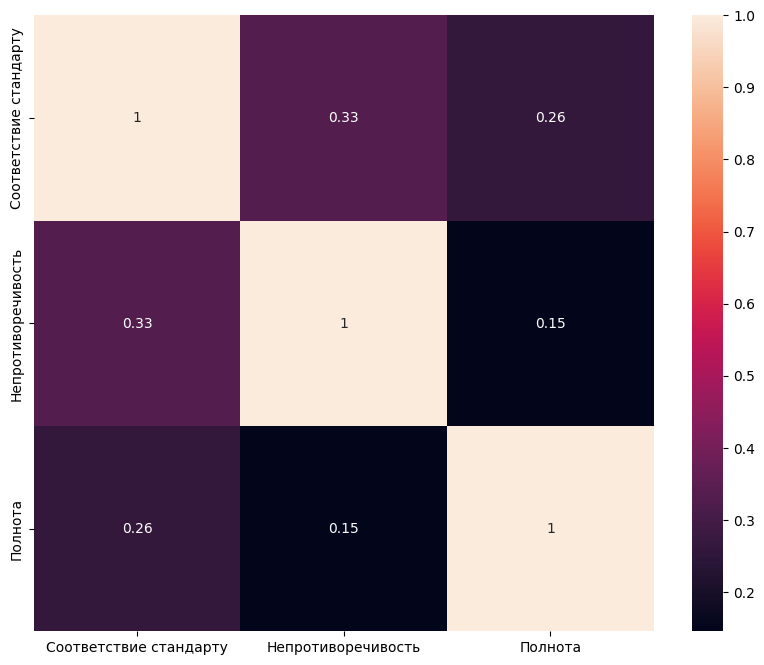

In [ ]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [ ]:
data.describe()

,Соответствие стандарту,Непротиворечивость,Полнота,Unnamed: 9
count,45.000000,45.000000,45.000000,0.0
mean,4.311111,4.200000,4.177778,NaN
std,0.763432,0.919486,0.747386,NaN
min,2.000000,2.000000,3.000000,NaN
25%,4.000000,4.000000,4.000000,NaN
50%,4.000000,4.000000,4.000000,NaN
75%,5.000000,5.000000,5.000000,NaN
max,5.000000,5.000000,5.000000,NaN


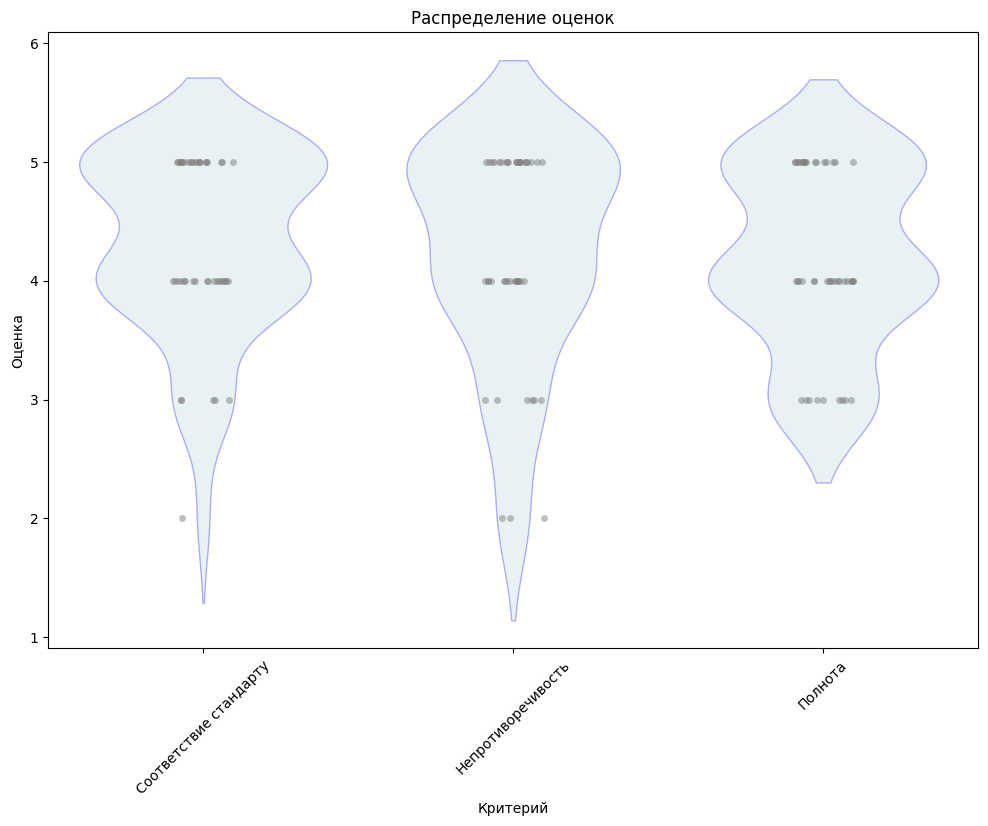

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Выбор необходимых столбцов для построения графика
plot_data = data[['Предметная область', 'Соответствие стандарту', 'Непротиворечивость', 'Полнота']]
plot_data = pd.melt(plot_data, id_vars=['Предметная область'], var_name='Критерий', value_name='Оценка')

#plot_data['Критерий'] = plot_data['Критерий'].map(criteria_map)

# Построение скрипичного графика с наложением точек
plt.figure(figsize=(12, 8))
#sns.violinplot(x='Критерий', y='Оценка', data=plot_data, inner=None, linewidth=1, edgecolor='blue')
sns.violinplot(x='Критерий', y='Оценка', data=plot_data, inner=None, linewidth=1, edgecolor='blue', alpha=0.3, color='lightblue')
sns.stripplot(x='Критерий', y='Оценка', data=plot_data, color='grey', alpha=0.5)

plt.title('Распределение оценок')
plt.xlabel('Критерий')
plt.ylabel('Оценка')
plt.xticks(rotation=45)
#plt.grid(True)
plt.show()


<ipython-input-81-b7acafefa26e>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[criterion], kde=True, bins=3, palette="Blues", stat='density')
<ipython-input-81-b7acafefa26e>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[criterion], kde=True, bins=3, palette="Blues", stat='density')
<ipython-input-81-b7acafefa26e>:14: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[criterion], kde=True, bins=3, palette="Blues", stat='density')


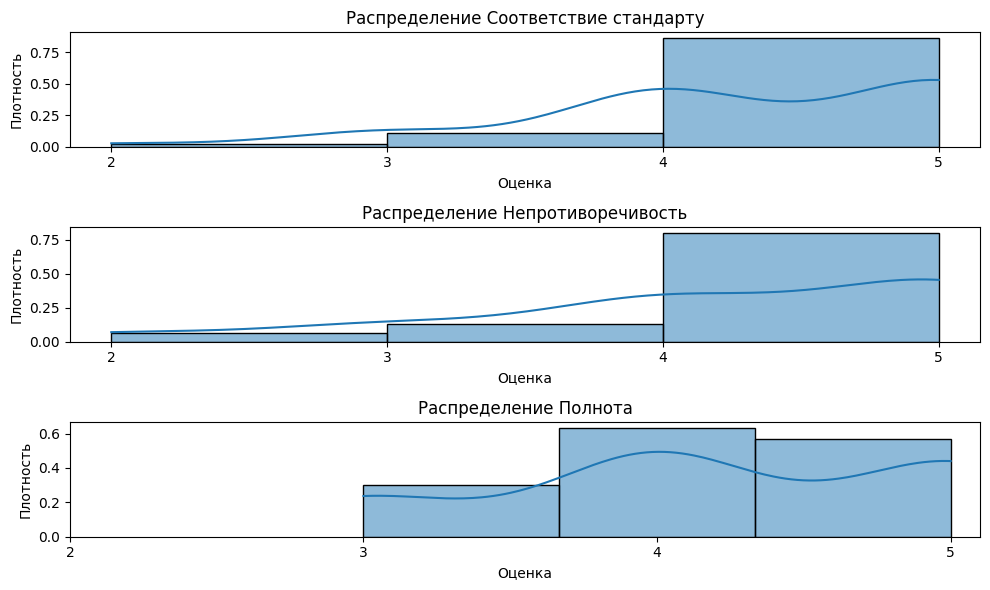

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("grade.csv")

# Построение графиков распределения
plt.figure(figsize=(10, 6))

# Цикл по каждому критерию для построения графика распределения
for i, criterion in enumerate(['Соответствие стандарту', 'Непротиворечивость', 'Полнота']):
    plt.subplot(3, 1, i+1)
    #sns.histplot(data[criterion], kde=True, bins=5, color='orange')
    sns.histplot(data[criterion], kde=True, bins=3, palette="Blues", stat='density')
    plt.title(f'Распределение {criterion}')
    plt.xlabel('Оценка')
    plt.ylabel('Плотность')
    plt.xticks(range(2, 6))  # Установка делений на оси x только для целых чисел

plt.tight_layout()
plt.show()


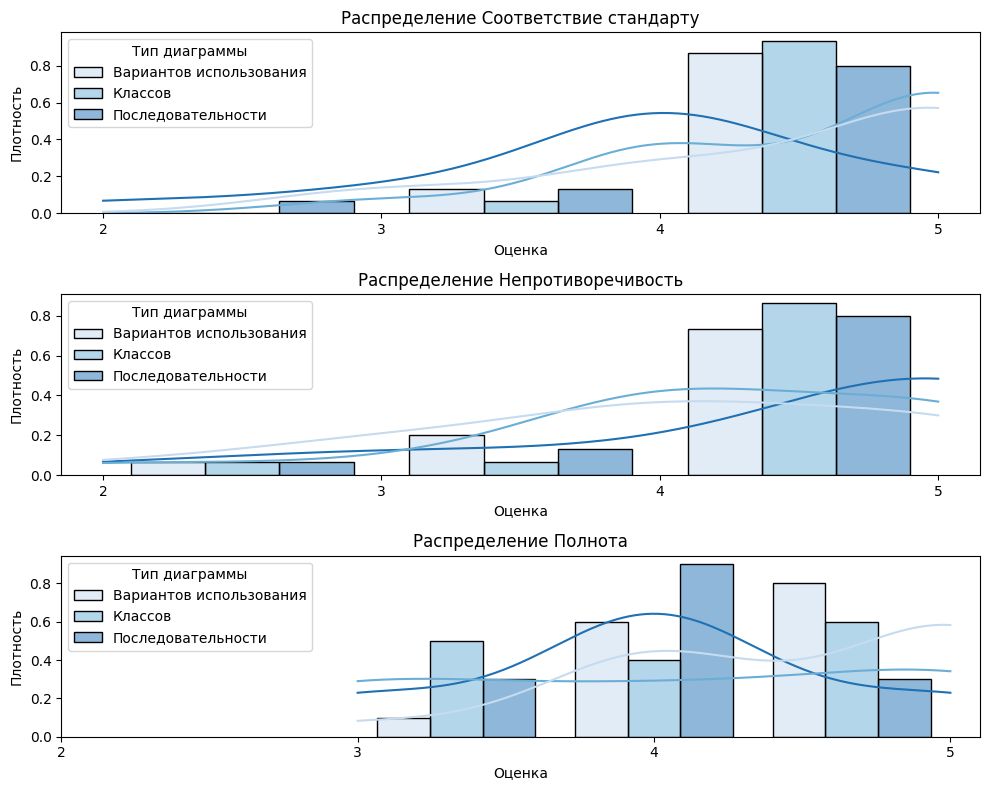

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Определение палитры цветов для различных типов UML диаграмм
#palette = sns.color_palette("husl", len(data['Тип диаграммы'].unique()))
palette = sns.color_palette("Blues", len(data['Тип диаграммы'].unique()))
# Построение графиков распределения
plt.figure(figsize=(10, 8))

# Цикл по каждому критерию для построения графика распределения
for i, criterion in enumerate(['Соответствие стандарту', 'Непротиворечивость', 'Полнота']):
    plt.subplot(3, 1, i+1)
    sns.histplot(data=data, x=criterion, hue='Тип диаграммы', bins=3, kde=True, multiple='dodge', shrink=0.8, stat='density', common_norm=False, palette=palette)
    plt.title(f'Распределение {criterion}')
    plt.xlabel('Оценка')
    plt.ylabel('Плотность')
    plt.xticks(range(2, 6))  # Установка делений на оси x только для целых чисел

plt.tight_layout()
plt.show()
